In [1]:
import boto3
import pandas as pd
import seaborn as sns
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

# Load the Dataset

In [2]:
bucket_name = 'iiaweb-s3-io-practice-bucket'
key = '652/1/652200101092009.gzip'

s3_client = boto3.client('s3')

# key = zipped_filekeys[0]
obj = s3_client.get_object(Bucket= bucket_name, Key= key)


print("Loading file: ", key)
df = pd.read_csv(obj['Body'], compression='gzip')
df.head()

Loading file:  652/1/652200101092009.gzip


,timestamp,FPAC,BLAC,CTAC,TH,MH,EGT_1,EGT_2,EGT_3,EGT_4,...,DVER_2,ESN_3,ECYC_3,ECYC_4,EHRS_1,EHRS_4,EHRS_3,EHRS_2,ESN_1,ESN_2
0,2001-01-09 20:09:00,0,0,0,0,0,30.5,29.5,31.0,30.5,...,50,8095,6711,7388,8600,7131,6359,5633,7882,7833
1,2001-01-09 20:09:01,0,0,0,0,0,30.5,29.5,31.0,30.5,...,50,8095,6711,7388,8600,7131,6359,5633,7882,7833
2,2001-01-09 20:09:02,0,0,0,0,0,30.5,29.5,31.0,30.5,...,50,8095,6711,7388,8600,7131,6359,5633,7882,7833
3,2001-01-09 20:09:03,0,0,0,0,0,30.5,29.5,31.0,30.5,...,50,8095,6711,7388,8600,7131,6359,5633,7882,7833
4,2001-01-09 20:09:04,0,0,0,0,0,30.5,29.5,31.0,30.5,...,50,8095,6711,7388,8600,7131,6359,5633,7882,7833


In [3]:
df.tail()

,timestamp,FPAC,BLAC,CTAC,TH,MH,EGT_1,EGT_2,EGT_3,EGT_4,...,DVER_2,ESN_3,ECYC_3,ECYC_4,EHRS_1,EHRS_4,EHRS_3,EHRS_2,ESN_1,ESN_2
3938,2001-01-09 20:41:46,0,0,0,0,0,101.5,142.5,158.5,217.5,...,50,8095,6711,7388,8600,7131,6359,5633,7882,7833
3939,2001-01-09 20:41:47,0,0,0,0,0,101.5,142.5,158.5,217.0,...,50,8095,6711,7388,8600,7131,6359,5633,7882,7833
3940,2001-01-09 20:41:48,0,0,0,0,0,101.5,141.5,157.5,216.0,...,50,8095,6711,7388,8600,7131,6359,5633,7882,7833
3941,2001-01-09 20:41:49,0,0,0,0,0,101.5,141.5,157.0,215.0,...,50,8095,6711,7388,8600,7131,6359,5633,7882,7833
3942,2001-01-09 20:41:50,0,0,0,0,0,101.5,141.5,156.0,214.5,...,50,8095,6711,7388,8600,7131,6359,5633,7882,7833


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3943 entries, 0 to 3942
Columns: 187 entries, timestamp to ESN_2
dtypes: float64(58), int64(128), object(1)
memory usage: 5.6+ MB


## Naive Check for Point Anomalies

In [5]:
#'AOAC', 'VIB_4', EG
col = 'VIB_4'
def check_warnings(col):
    summary = df[col].agg(['mean', 'std'])
    rfloor = summary.loc['mean'] - 3*summary.loc['std']
    rceiling = summary.loc['mean'] + 3*summary.loc['std']
    warnings = df[(df[col]<=rfloor)
                 | (df[col]>=rceiling)]
    print(len(warnings))
    return warnings
warnings = check_warnings(col)
warnings.head()
# sns.distplot(df['MH'])

3943


,timestamp,FPAC,BLAC,CTAC,TH,MH,EGT_1,EGT_2,EGT_3,EGT_4,...,DVER_2,ESN_3,ECYC_3,ECYC_4,EHRS_1,EHRS_4,EHRS_3,EHRS_2,ESN_1,ESN_2
0,2001-01-09 20:09:00,0,0,0,0,0,30.5,29.5,31.0,30.5,...,50,8095,6711,7388,8600,7131,6359,5633,7882,7833
1,2001-01-09 20:09:01,0,0,0,0,0,30.5,29.5,31.0,30.5,...,50,8095,6711,7388,8600,7131,6359,5633,7882,7833
2,2001-01-09 20:09:02,0,0,0,0,0,30.5,29.5,31.0,30.5,...,50,8095,6711,7388,8600,7131,6359,5633,7882,7833
3,2001-01-09 20:09:03,0,0,0,0,0,30.5,29.5,31.0,30.5,...,50,8095,6711,7388,8600,7131,6359,5633,7882,7833
4,2001-01-09 20:09:04,0,0,0,0,0,30.5,29.5,31.0,30.5,...,50,8095,6711,7388,8600,7131,6359,5633,7882,7833


# Preprocessing

In [6]:
df['SecondsElapsed'] = list(range(len(df)))
df.head()

,timestamp,FPAC,BLAC,CTAC,TH,MH,EGT_1,EGT_2,EGT_3,EGT_4,...,ESN_3,ECYC_3,ECYC_4,EHRS_1,EHRS_4,EHRS_3,EHRS_2,ESN_1,ESN_2,SecondsElapsed
0,2001-01-09 20:09:00,0,0,0,0,0,30.5,29.5,31.0,30.5,...,8095,6711,7388,8600,7131,6359,5633,7882,7833,0
1,2001-01-09 20:09:01,0,0,0,0,0,30.5,29.5,31.0,30.5,...,8095,6711,7388,8600,7131,6359,5633,7882,7833,1
2,2001-01-09 20:09:02,0,0,0,0,0,30.5,29.5,31.0,30.5,...,8095,6711,7388,8600,7131,6359,5633,7882,7833,2
3,2001-01-09 20:09:03,0,0,0,0,0,30.5,29.5,31.0,30.5,...,8095,6711,7388,8600,7131,6359,5633,7882,7833,3
4,2001-01-09 20:09:04,0,0,0,0,0,30.5,29.5,31.0,30.5,...,8095,6711,7388,8600,7131,6359,5633,7882,7833,4


In [7]:
df.timestamp = pd.to_datetime(df.timestamp)
df = df.set_index('timestamp')
df.head()

,FPAC,BLAC,CTAC,TH,MH,EGT_1,EGT_2,EGT_3,EGT_4,IVV,...,ESN_3,ECYC_3,ECYC_4,EHRS_1,EHRS_4,EHRS_3,EHRS_2,ESN_1,ESN_2,SecondsElapsed
timestamp,,,,,,,,,,,,,,,,,,,,,
2001-01-09 20:09:00,0,0,0,0,0,30.5,29.5,31.0,30.5,0,...,8095,6711,7388,8600,7131,6359,5633,7882,7833,0
2001-01-09 20:09:01,0,0,0,0,0,30.5,29.5,31.0,30.5,0,...,8095,6711,7388,8600,7131,6359,5633,7882,7833,1
2001-01-09 20:09:02,0,0,0,0,0,30.5,29.5,31.0,30.5,0,...,8095,6711,7388,8600,7131,6359,5633,7882,7833,2
2001-01-09 20:09:03,0,0,0,0,0,30.5,29.5,31.0,30.5,0,...,8095,6711,7388,8600,7131,6359,5633,7882,7833,3
2001-01-09 20:09:04,0,0,0,0,0,30.5,29.5,31.0,30.5,0,...,8095,6711,7388,8600,7131,6359,5633,7882,7833,4


In [8]:
time = df.index
cols = df.columns

standard_scaler = preprocessing.StandardScaler()
data = standard_scaler.fit_transform(df)
df = pd.DataFrame(data)
df.index = time
df.columns = cols
df.head()

,FPAC,BLAC,CTAC,TH,MH,EGT_1,EGT_2,EGT_3,EGT_4,IVV,...,ESN_3,ECYC_3,ECYC_4,EHRS_1,EHRS_4,EHRS_3,EHRS_2,ESN_1,ESN_2,SecondsElapsed
timestamp,,,,,,,,,,,,,,,,,,,,,
2001-01-09 20:09:00,0.0,0.0,0.0,0.0,0.0,-1.996646,-0.870483,-0.555774,-0.29315,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.731612
2001-01-09 20:09:01,0.0,0.0,0.0,0.0,0.0,-1.996646,-0.870483,-0.555774,-0.29315,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.730733
2001-01-09 20:09:02,0.0,0.0,0.0,0.0,0.0,-1.996646,-0.870483,-0.555774,-0.29315,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.729855
2001-01-09 20:09:03,0.0,0.0,0.0,0.0,0.0,-1.996646,-0.870483,-0.555774,-0.29315,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.728976
2001-01-09 20:09:04,0.0,0.0,0.0,0.0,0.0,-1.996646,-0.870483,-0.555774,-0.29315,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.728097


## Initial Viz

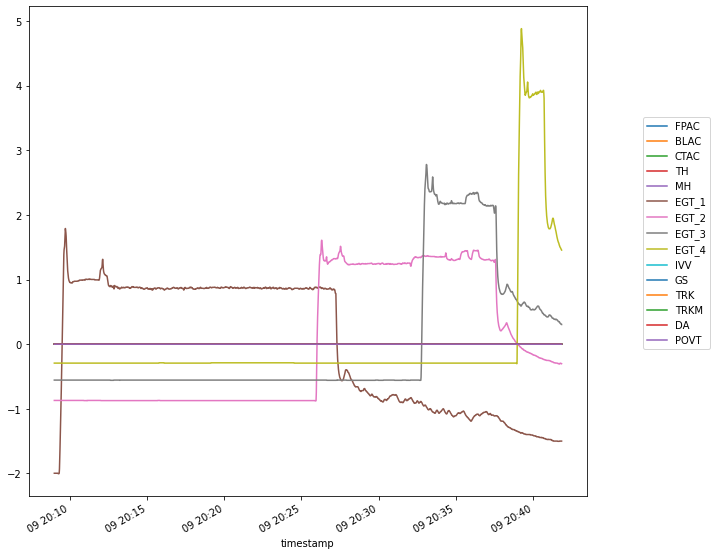

In [9]:
df[df.columns[:15]].plot(figsize=(10,10))
plt.legend(loc=(1.1,0.3))

<AxesSubplot:xlabel='timestamp'>

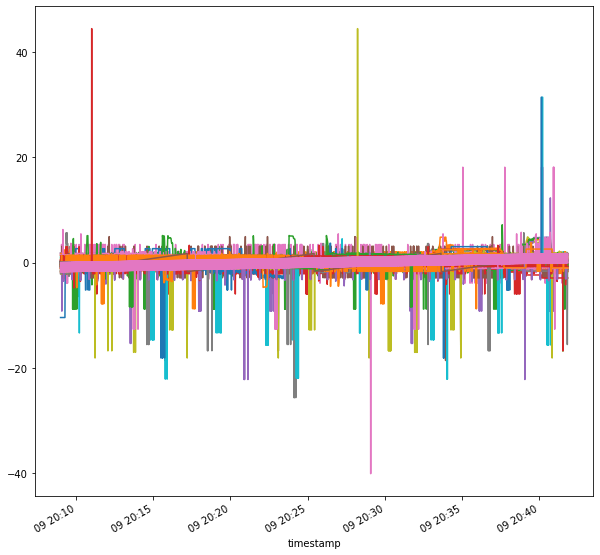

In [10]:
df.plot(figsize=(10,10), legend=None)

## Anomaly Detection V1: Clustering

In [11]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm # not available on Kaggle Kernel
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

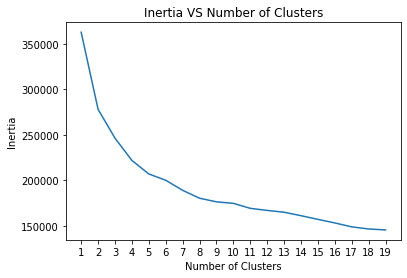

In [15]:
# calculate with different number of centroids to see the loss plot (elbow method)
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].inertia_ for i in range(len(kmeans))]
fig, ax = plt.subplots()
plt.xticks(list(range(1,20)))
ax.plot(n_cluster, scores)
plt.title('Inertia VS Number of Clusters')
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')
plt.show()

In [16]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)
principal_components.shape

(3943, 2)

In [17]:
#Choosing 10 Clusters based on above plot
df['cluster'] = kmeans[9].predict(data)
df['cluster'].value_counts()

9    937
1    788
6    587
8    562
4    370
2    311
7    192
0    146
3     36
5     14
Name: cluster, dtype: int64

In [18]:
sns.set_style('darkgrid')

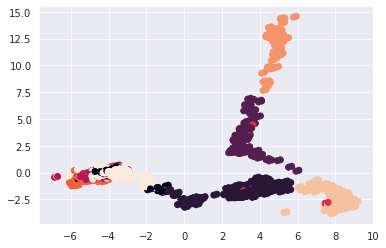

In [19]:
plt.scatter(principal_components[:,0], principal_components[:,1], c=df["cluster"])

In [20]:
df.head()

,FPAC,BLAC,CTAC,TH,MH,EGT_1,EGT_2,EGT_3,EGT_4,IVV,...,ECYC_3,ECYC_4,EHRS_1,EHRS_4,EHRS_3,EHRS_2,ESN_1,ESN_2,SecondsElapsed,cluster
timestamp,,,,,,,,,,,,,,,,,,,,,
2001-01-09 20:09:00,0.0,0.0,0.0,0.0,0.0,-1.996646,-0.870483,-0.555774,-0.29315,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.731612,3
2001-01-09 20:09:01,0.0,0.0,0.0,0.0,0.0,-1.996646,-0.870483,-0.555774,-0.29315,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.730733,3
2001-01-09 20:09:02,0.0,0.0,0.0,0.0,0.0,-1.996646,-0.870483,-0.555774,-0.29315,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.729855,3
2001-01-09 20:09:03,0.0,0.0,0.0,0.0,0.0,-1.996646,-0.870483,-0.555774,-0.29315,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.728976,3
2001-01-09 20:09:04,0.0,0.0,0.0,0.0,0.0,-1.996646,-0.870483,-0.555774,-0.29315,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.728097,3


In [21]:
def getDistanceByPoint(d, model):
    distance = []
    for i in range(0,len(d)):
        Xa = np.array(d.iloc[i][:187])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return distance

#Arbitrary Outlier Fraction
outliers_fraction = 0.01

distance = getDistanceByPoint(df, kmeans[9])
# number_of_outliers = int(outliers_fraction*len(distance))
threshold = pd.Series(distance).quantile(q=1-outliers_fraction)

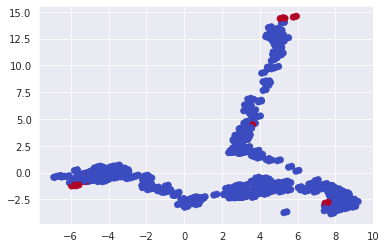

In [24]:
# anomalyCluster contain the anomaly result of method 2.1 Cluster (0:normal, 1:anomaly) 
df['anomalyCluster'] = (distance >= threshold).astype(int)
plt.scatter(principal_components[:,0], principal_components[:,1], c=df['anomalyCluster'], cmap='coolwarm')

In [25]:
df['anomalyCluster'].value_counts()

0    3903
1      40
Name: anomalyCluster, dtype: int64

In [26]:
df.columns[:20]

Index(['FPAC', 'BLAC', 'CTAC', 'TH', 'MH', 'EGT_1', 'EGT_2', 'EGT_3', 'EGT_4',
       'IVV', 'GS', 'TRK', 'TRKM', 'DA', 'POVT', 'WS', 'MW', 'DFGS', 'WD',
       'ALT'],
      dtype='object')

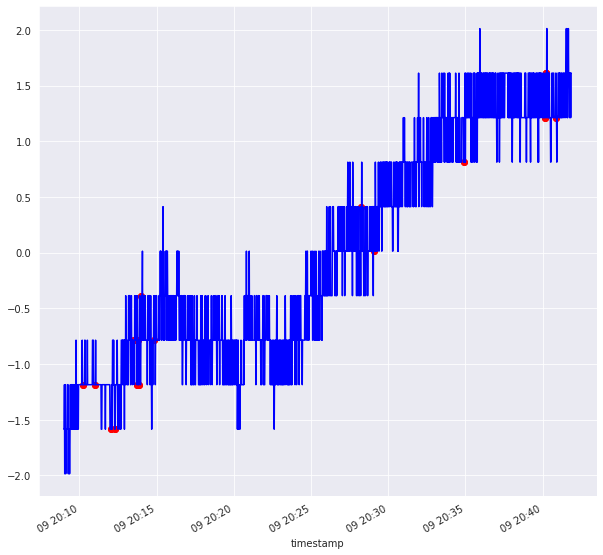

In [27]:
col = 'ALT'
a = df[df['anomalyCluster'] == 1][col] #anomaly
plt.figure(figsize=(10,10))
df[col].plot(color='blue')
plt.scatter(a.index, a, color='red')